EDA
============================

In [70]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud

### <span style="color:red">***주의***</span>


 #### 아직 모두의 말뭉치 신청이 안나서, 이전 데이터를 기반으로 데이터 분석을 수행 했습니다.

In [62]:
torch.cuda.is_available()
#seaborn 기초 테마 설정 및 한글 깨짐 수정.
sns.set()
sns.set_palette("husl",3)
plt.rcParams['font.family'] = 'NanumGothic'

In [63]:
df = pd.read_json("../pred_data.json")
df

,id,sentence_form,annotation
0,nikluge-sa-2022-test-00001,하나 사려고 알아보는 중인데 맘에드는거 발견,"[[제품 전체#일반, positive], [브랜드#일반, positive], [브랜..."
1,nikluge-sa-2022-test-00002,동양인 피부톤과 잘 어울리고 우아한 분위기를 풍긴다네?,"[[본품#품질, positive], [브랜드#품질, positive]]"
2,nikluge-sa-2022-test-00003,근데 이건 마르살라보다 더 지나친 색 같은데..,"[[제품 전체#디자인, negative], [본품#일반, negative], [본품..."
3,nikluge-sa-2022-test-00004,나스 색조가 다 그렇지만서도 어데이셔스 라인은 진짜 색 기막히게 뽑는것 같다,"[[제품 전체#디자인, positive], [본품#일반, positive], [본품..."
4,nikluge-sa-2022-test-00005,색상만 보면 이걸 어떻게 발라.. 싶겠지만 의외로 너무너무 괜찮다,"[[본품#일반, positive], [본품#다양성, positive], [패키지/구..."
...,...,...,...
2122,nikluge-sa-2022-test-02123,간단한 충전으로 간편한 사용이 가능한거죠.,"[[본품#편의성, positive], [패키지/구성품#편의성, positive]]"
2123,nikluge-sa-2022-test-02124,"눈을 가린 상태에서도 간편하게 조작이 가능하구요,","[[본품#품질, positive], [본품#편의성, positive], [패키지/구..."
2124,nikluge-sa-2022-test-02125,다양한 마사지로 관자놀이부터 눈주변까지 부드럽고 강력한 마사지가 진행됩니다.,"[[본품#품질, positive], [본품#편의성, positive], [패키지/구..."
2125,nikluge-sa-2022-test-02126,"본체부터 케이블, 설명서까지 깔끔하게 정리되어 보관이 가능하니 더더 맘에 쏙 들어요.","[[패키지/구성품#일반, positive], [패키지/구성품#편의성, positiv..."


In [64]:
df["sentence_len"] = df.sentence_form.str.len()
df

,id,sentence_form,annotation,sentence_len
0,nikluge-sa-2022-test-00001,하나 사려고 알아보는 중인데 맘에드는거 발견,"[[제품 전체#일반, positive], [브랜드#일반, positive], [브랜...",24
1,nikluge-sa-2022-test-00002,동양인 피부톤과 잘 어울리고 우아한 분위기를 풍긴다네?,"[[본품#품질, positive], [브랜드#품질, positive]]",30
2,nikluge-sa-2022-test-00003,근데 이건 마르살라보다 더 지나친 색 같은데..,"[[제품 전체#디자인, negative], [본품#일반, negative], [본품...",26
3,nikluge-sa-2022-test-00004,나스 색조가 다 그렇지만서도 어데이셔스 라인은 진짜 색 기막히게 뽑는것 같다,"[[제품 전체#디자인, positive], [본품#일반, positive], [본품...",42
4,nikluge-sa-2022-test-00005,색상만 보면 이걸 어떻게 발라.. 싶겠지만 의외로 너무너무 괜찮다,"[[본품#일반, positive], [본품#다양성, positive], [패키지/구...",36
...,...,...,...,...
2122,nikluge-sa-2022-test-02123,간단한 충전으로 간편한 사용이 가능한거죠.,"[[본품#편의성, positive], [패키지/구성품#편의성, positive]]",23
2123,nikluge-sa-2022-test-02124,"눈을 가린 상태에서도 간편하게 조작이 가능하구요,","[[본품#품질, positive], [본품#편의성, positive], [패키지/구...",27
2124,nikluge-sa-2022-test-02125,다양한 마사지로 관자놀이부터 눈주변까지 부드럽고 강력한 마사지가 진행됩니다.,"[[본품#품질, positive], [본품#편의성, positive], [패키지/구...",42
2125,nikluge-sa-2022-test-02126,"본체부터 케이블, 설명서까지 깔끔하게 정리되어 보관이 가능하니 더더 맘에 쏙 들어요.","[[패키지/구성품#일반, positive], [패키지/구성품#편의성, positiv...",47


In [65]:
df.sentence_form.describe()
#중복되는 문장이 두개 존재.

count                             2127
unique                            2125
top       쉽게 넘어지지않으니, 넘어지거나 할 염려도 없어요.
freq                                 2
Name: sentence_form, dtype: object

In [66]:
df.sentence_len.describe()
#평균적으로 문장의 길이가 60개 정도.

count    2127.000000
mean       45.093089
std        27.097100
min         4.000000
25%        25.000000
50%        40.000000
75%        59.000000
max       207.000000
Name: sentence_len, dtype: float64

Text(0.5, 1.0, 'sentence_len')

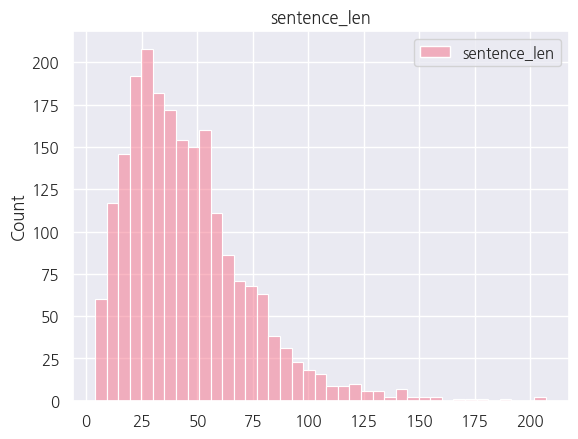

In [67]:
g = sns.histplot(data=df)
plt.title("sentence_len")

In [ ]:
####워드클라우드로 어떤 단어가 많이 등장하는지 시각화 해볼 예정.

In [68]:
#annotation 분석해보기.
df["annotation_len"] = df.annotation.apply(len)
df['annotation_len'].describe()

count    2127.000000
mean        4.516220
std         2.389731
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        19.000000
Name: annotation_len, dtype: float64

#### 한 문장에 얼마나 속성이 많은지를 시각화
##### 대체로 평균은 4~5개를 가지고, 최대 15개의 속성을 가지기도 했다.

Text(0.5, 1.0, '속성의 개수')

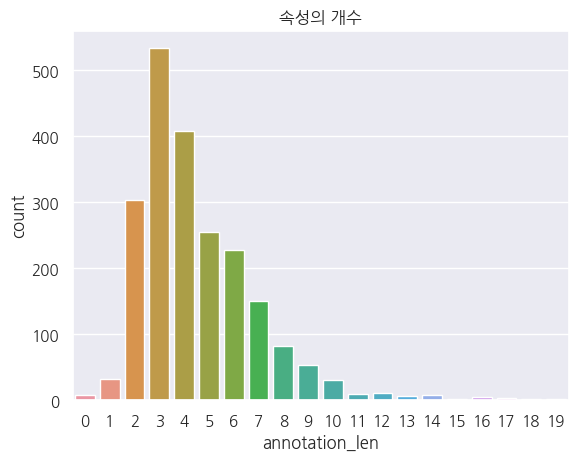

In [69]:
sns.countplot(x="annotation_len",data=df)
plt.title("속성의 개수")